In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import csv
import warnings
warnings.filterwarnings('ignore')

In [3]:
soc=pd.read_csv(r"D:\Asus\Videos\compresive_strength_concrete+2.csv")

In [4]:
soc.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Renaming columns of the dataset

In [5]:
soc.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
soc.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement(kg/m^3)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BFSlag(kg/m^3)',
'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash(kg/m^3)', 'Water  (component 4)(kg in a m^3 mixture)':'Water(kg/m^3)',
   'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer(kg/m^3)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CoarseAgg(kg/m^3)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAgg(kg/m^3)', 'Age (day)':'Age', 'Concrete compressive strength(MPa, megapascals) ': 'Comp_Strength(MPa)'     }, inplace=True)

In [7]:
soc

,Cement(kg/m^3),BFSlag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),CoarseAgg(kg/m^3),FineAgg(kg/m^3),Age,Comp_Strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### We are to predict the last variable, i.e. CompStrength; so taking that as our dependent variable and rest others as independent variables

In [8]:
soc.describe().T


,count,mean,std,min,25%,50%,75%,max
Cement(kg/m^3),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BFSlag(kg/m^3),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash(kg/m^3),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water(kg/m^3),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer(kg/m^3),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAgg(kg/m^3),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAgg(kg/m^3),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Comp_Strength(MPa),1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cement(kg/m^3)            1030 non-null   float64
 1   BFSlag(kg/m^3)            1030 non-null   float64
 2   Fly_Ash(kg/m^3)           1030 non-null   float64
 3   Water(kg/m^3)             1030 non-null   float64
 4   Superplasticizer(kg/m^3)  1030 non-null   float64
 5   CoarseAgg(kg/m^3)         1030 non-null   float64
 6   FineAgg(kg/m^3)           1030 non-null   float64
 7   Age                       1030 non-null   int64  
 8   Comp_Strength(MPa)        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### All required variables are either int64 type or flaot64 type

In [10]:
soc.sum()

Cement(kg/m^3)               289602.9
BFSlag(kg/m^3)                76112.7
Fly_Ash(kg/m^3)               55814.0
Water(kg/m^3)                187014.3
Superplasticizer(kg/m^3)       6390.8
CoarseAgg(kg/m^3)           1002106.5
FineAgg(kg/m^3)              796787.9
Age                           47032.0
Comp_Strength(MPa)            36892.5
dtype: float64

### So all the columns are non-null and have int/digit values

In [11]:
for i in soc.columns:
    is_zero=(soc['Cement(kg/m^3)']==0).sum()
    print(is_zero)

0
0
0
0
0
0
0
0
0


### None of the columns contain zero values so it appears that alsmost all variabes have coreect valuies

#### Finding outliers

In [12]:
pctl25=soc['Cement(kg/m^3)'].quantile(.25)
pctl75=soc['Cement(kg/m^3)'].quantile(.75)
inter_quartile_range=pctl75-pctl25
outliers=[]
left=pctl25-1.5*inter_quartile_range
right=pctl75+1.5*inter_quartile_range
left_outlier=soc[soc['Cement(kg/m^3)']<left]['Cement(kg/m^3)']
right_outlier=soc[soc['Cement(kg/m^3)']>right]['Cement(kg/m^3)']

outliers.append([left_outlier,right_outlier])

In [13]:
outliers

[[Series([], Name: Cement(kg/m^3), dtype: float64),
  Series([], Name: Cement(kg/m^3), dtype: float64)]]

#### NO OUTLIERS; atleast for Cement(kg/m^3)

In [14]:
scipy.stats.iqr(soc['Cement(kg/m^3)'])

157.625

In [15]:
inter_quartile_range

157.625

In [16]:
left

-44.0625

In [17]:
right

586.4375

### Repeating same excercise for Water

In [18]:
pctl25=soc['Water(kg/m^3)'].quantile(.25)
pctl75=soc['Water(kg/m^3)'].quantile(.75)
inter_quartile_range=pctl75-pctl25
outliers=[]
left=pctl25-1.5*inter_quartile_range
right=pctl75+1.5*inter_quartile_range
left_outlier=soc[soc['Water(kg/m^3)']<left]['Water(kg/m^3)']
right_outlier=soc[soc['Water(kg/m^3)']>right]['Water(kg/m^3)']

outliers.append([left_outlier,right_outlier])

# Now changing the values of these outliers to median value as most of the density plots are skewed.
soc[soc['Water(kg/m^3)']<left]=soc['Water(kg/m^3)'].median()
soc[soc['Water(kg/m^3)']>right]=soc['Water(kg/m^3)'].median()


print((soc['Water(kg/m^3)']<left).sum())
print((soc['Water(kg/m^3)']>right).sum())



0
0


In [19]:
soc['Water(kg/m^3)'].median()

185.0

In [20]:
right

232.64999999999998

In [21]:
left #the left most value that isn't an outlier

124.25000000000001

In [22]:
right #the right most value that isn't an outlier

232.64999999999998

In [23]:
inter_quartile_range

27.099999999999994

In [24]:
left_outlier

224    121.8
225    121.8
226    121.8
227    121.8
228    121.8
Name: Water(kg/m^3), dtype: float64

In [25]:
right_outlier

862     237.0
873     247.0
936     246.9
1019    236.7
Name: Water(kg/m^3), dtype: float64

In [26]:
(soc['Water(kg/m^3)']>right).sum()  # no. of outliers to the right side

0

In [27]:
(soc['Water(kg/m^3)']<left).sum()  # no. of outliers to the left side

0

## Time to see Uni-Variate Plots

<AxesSubplot:>

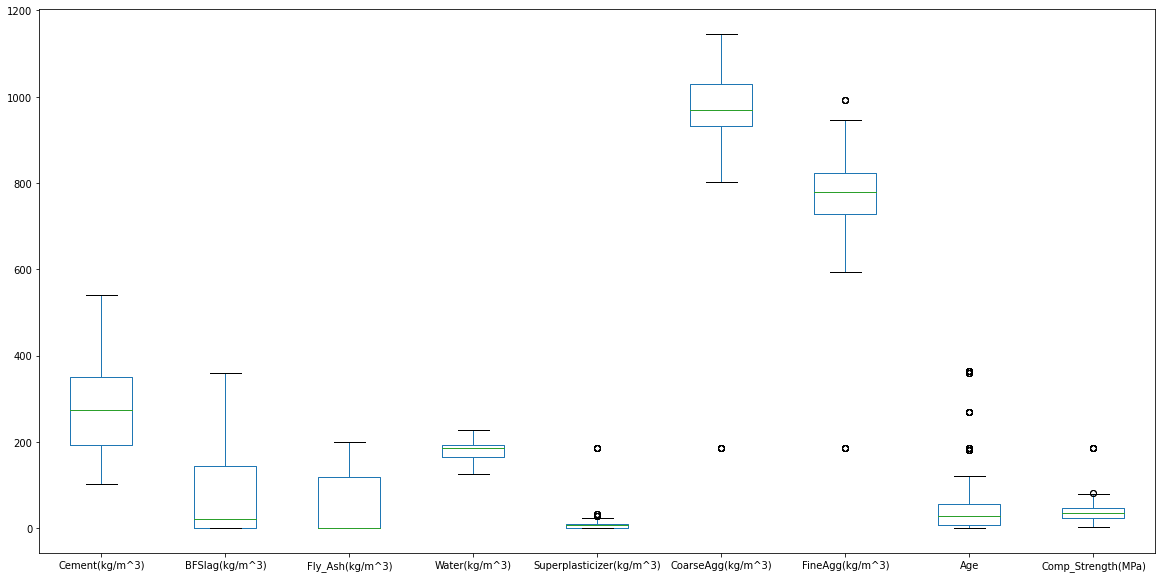

In [28]:

soc.boxplot(figsize=[20,10], grid=False)

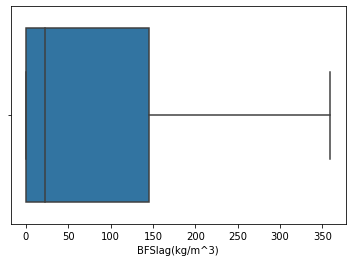

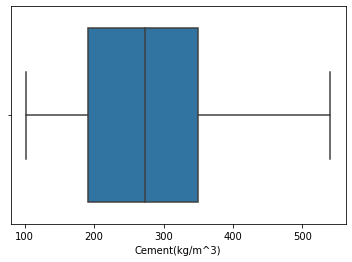

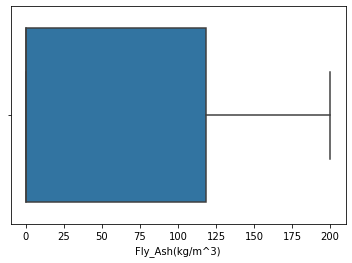

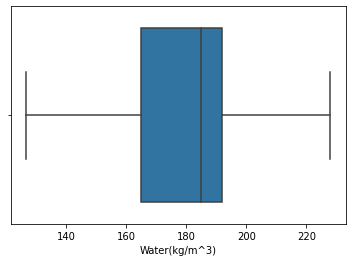

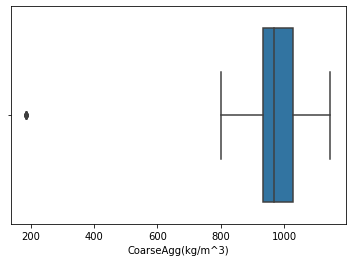

In [29]:
sns.boxplot(soc['BFSlag(kg/m^3)']);
plt.show()
sns.boxplot(soc['Cement(kg/m^3)']);
plt.show()
sns.boxplot(soc['Fly_Ash(kg/m^3)']);
plt.show()
sns.boxplot(soc['Water(kg/m^3)']);
plt.show()
sns.boxplot(soc['CoarseAgg(kg/m^3)']);
plt.show()


In [30]:
soc.columns

Index(['Cement(kg/m^3)', 'BFSlag(kg/m^3)', 'Fly_Ash(kg/m^3)', 'Water(kg/m^3)',
       'Superplasticizer(kg/m^3)', 'CoarseAgg(kg/m^3)', 'FineAgg(kg/m^3)',
       'Age', 'Comp_Strength(MPa)'],
      dtype='object')

## Plotting some Distribution PLots using Seaborn and Subplots from Matplotlib

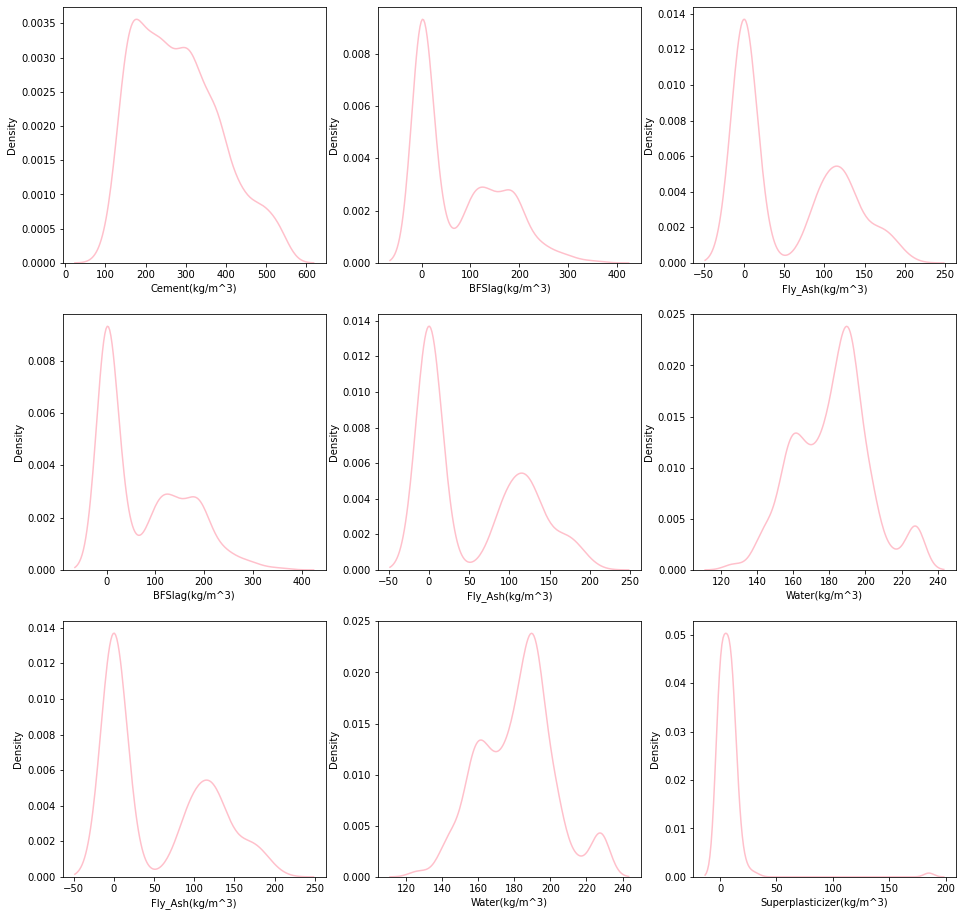

In [31]:
fig, ax= plt.subplots(nrows=3,ncols=3, figsize=[16,16])
"""
sns.distplot(soc['BFSlag(kg/m^3)'], hist=False, ax=ax[0][0] , color='pink')

sns.distplot(soc['Cement(kg/m^3)'], hist=False, ax=ax[0][1])

sns.distplot(soc['Fly_Ash(kg/m^3)'], hist=False, ax=ax[0][2],color='pink')

sns.distplot(soc['Water(kg/m^3)'], hist=False, ax=ax[1][0])

sns.distplot(soc['CoarseAgg(kg/m^3)'], hist=False, ax=ax[1][1],color='pink')

sns.distplot(soc['Superplasticizer(kg/m^3)'], hist=False, ax=ax[1][2] )

sns.distplot(soc['FineAgg(kg/m^3)'], hist=False, ax=ax[2][0],color='pink')

sns.distplot(soc['Age'], hist=False, ax=ax[2][1])

sns.distplot(soc['Comp_Strength(MPa)'], hist=False, ax=ax[2][2],color='pink')
"""
cols=soc.columns
cols=str(cols)
for i in range(0,3):
    for j in range(0,3):
        sns.distplot(soc.iloc[:,(i+j)], hist=False, ax=ax[i][j] , color='pink')
    

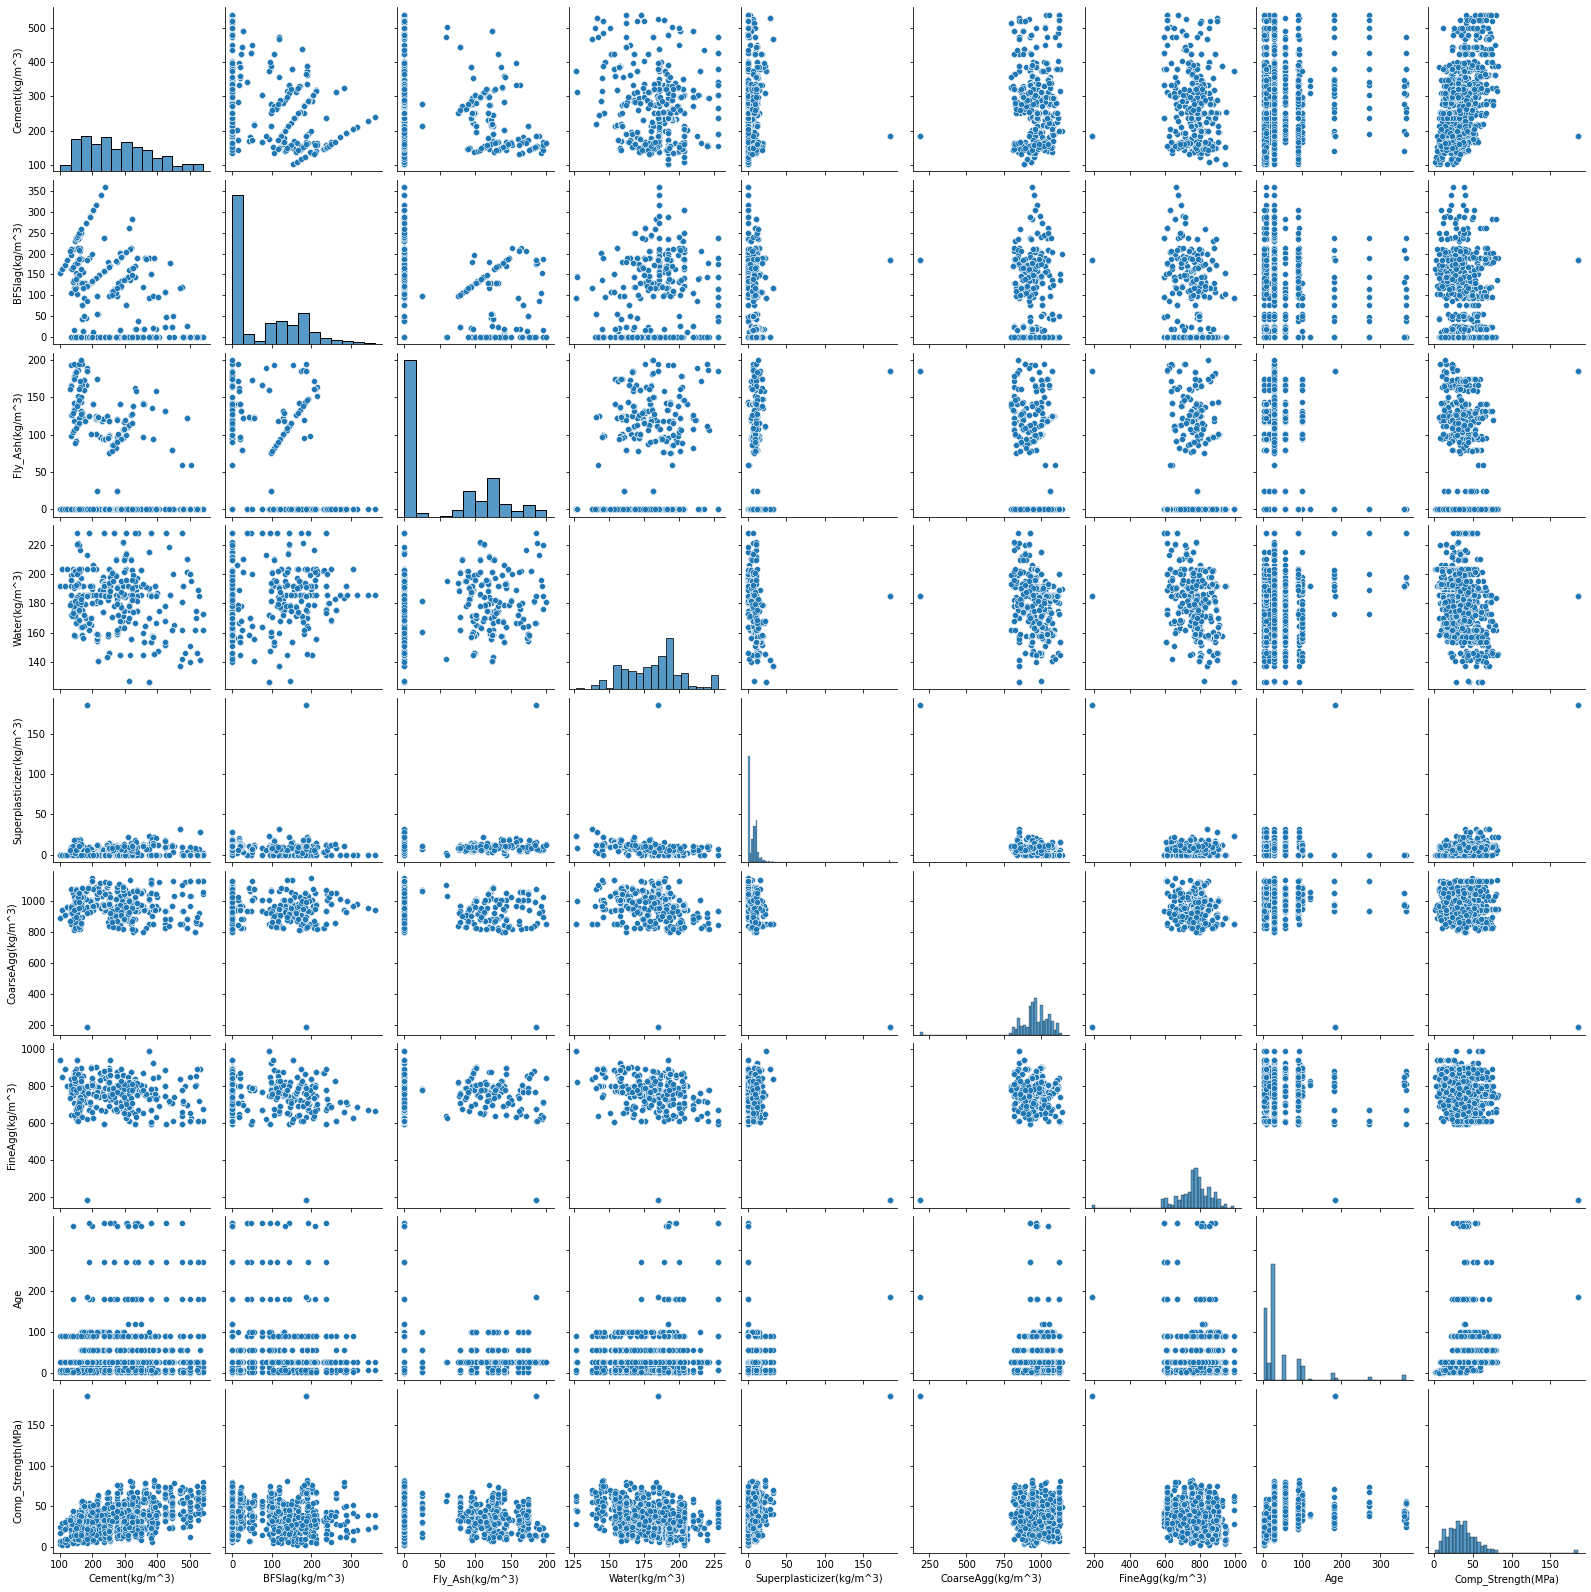

In [32]:
sns.pairplot(soc, kind='scatter')

## Correlation b/w variables

<AxesSubplot:>

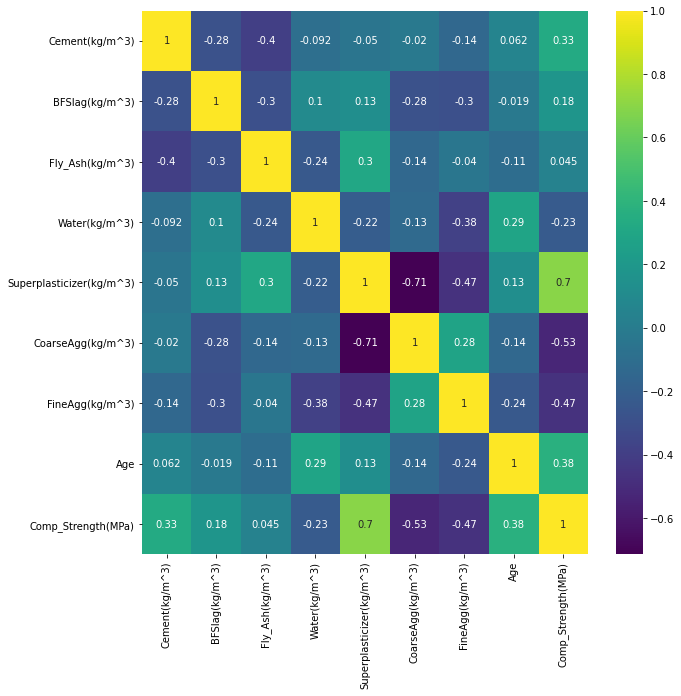

In [33]:
plt.figure(figsize=[10,10])
sns.heatmap(soc.corr(), annot=True, cmap='viridis')

### We can't see multi-collinearity so no need for PCA

##### Removing outliers for entire dataset

In [34]:
for i in soc.columns[:-1]:
    i=str(i)
    pctl25=soc[i].quantile(.25)
    pctl75=soc[i].quantile(.75)
    inter_quartile_range=pctl75-pctl25
    
    left=pctl25-1.5*inter_quartile_range
    right=pctl75+1.5*inter_quartile_range
    left_outlier=soc[soc[i]<left][i]
    right_outlier=soc[soc[i]>right][i]

    
    # Now changing the values of these outliers to median value as most of the density plots are skewed.
    soc[soc[i]<left]=soc[i].median()
    soc[soc[i]>right]=soc[i].median()


    print((soc[i]<left).sum())
    print((soc[i]>right).sum())






0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<AxesSubplot:>

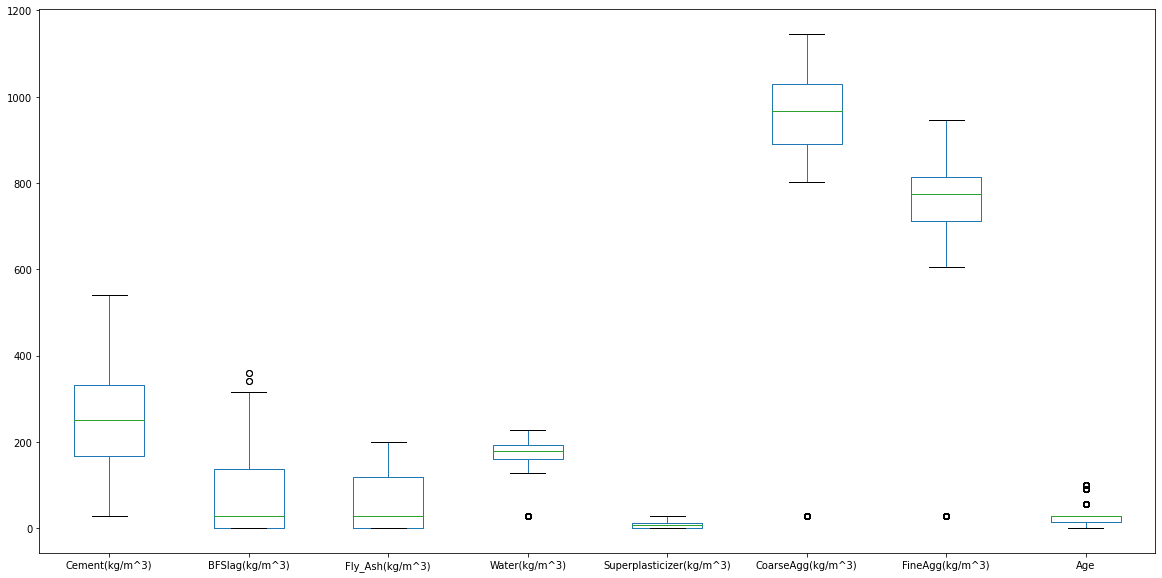

In [35]:
soc.iloc[:,:-1].boxplot(figsize=[20,10], grid=False)

### Now Compare it with the last boxplot we plotted

In [36]:
x=soc.iloc[:,:-1]
y=soc.iloc[:,-1]

In [37]:
y

0       79.99
1       61.89
2       28.00
3       28.00
4       28.00
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Comp_Strength(MPa), Length: 1030, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.3)

In [40]:
xtrain.count()

Cement(kg/m^3)              721
BFSlag(kg/m^3)              721
Fly_Ash(kg/m^3)             721
Water(kg/m^3)               721
Superplasticizer(kg/m^3)    721
CoarseAgg(kg/m^3)           721
FineAgg(kg/m^3)             721
Age                         721
dtype: int64

In [41]:
xtest.count()

Cement(kg/m^3)              309
BFSlag(kg/m^3)              309
Fly_Ash(kg/m^3)             309
Water(kg/m^3)               309
Superplasticizer(kg/m^3)    309
CoarseAgg(kg/m^3)           309
FineAgg(kg/m^3)             309
Age                         309
dtype: int64

In [42]:
ytest

133    67.70
771    13.52
926    30.65
462    37.68
857    33.30
       ...  
596    10.73
354    30.45
919    25.10
479    38.02
891    13.46
Name: Comp_Strength(MPa), Length: 309, dtype: float64

In [43]:
ytrain

172     65.20
631     17.54
724     35.76
152     77.30
363     63.53
        ...  
108     47.10
1009    42.64
127     55.50
155     77.30
56      28.00
Name: Comp_Strength(MPa), Length: 721, dtype: float64

In [44]:
from scipy.stats import zscore as zs
xtrain.apply(zs)
xtest.apply(zs)

,Cement(kg/m^3),BFSlag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),CoarseAgg(kg/m^3),FineAgg(kg/m^3),Age
133,0.272196,1.452295,-0.912811,-0.513886,0.403288,0.389898,0.439086,-0.179239
771,0.642427,-0.825895,-0.912811,0.520717,-1.024975,0.292659,0.537456,-1.110387
926,-0.757327,1.600848,1.782131,0.739449,0.250260,-0.284922,-0.132201,-0.179239
462,-0.671188,-0.671672,1.920165,-0.249220,-0.502129,0.396112,0.682471,2.502470
857,-1.005804,1.521469,1.732834,0.236365,-0.387358,-0.113110,0.126425,-0.179239
...,...,...,...,...,...,...,...,...
596,-0.688582,0.937463,-0.912811,0.382916,-1.024975,0.470320,0.072391,-0.961404
354,0.196825,0.283149,-0.510213,-0.163915,0.403288,0.598631,0.341177,-1.110387
919,0.493341,-0.825895,-0.912811,0.214492,-0.004787,0.373082,0.523601,-0.179239
479,1.594922,-0.553737,0.385363,-0.135479,0.454297,0.252448,0.015586,-0.961404


## Model Builiding; starting with Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor as rfc


In [46]:
ob1=rfc(n_estimators=3, criterion='mse' )    ## geni index/ entropy were for classification error and mse and mae are for regression error
ob1.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=3)

In [47]:
ypred=ob1.predict(xtest)

In [48]:
from sklearn.metrics import mean_squared_error as mse
mse(ytest,ypred)

32.82437521375204

In [49]:
mean_squared_error=np.mean((ytest-ypred)**2)
print(mean_squared_error)

32.82437521375204


### Plotting a residual plot to check distribution of errors around mean value/0

<AxesSubplot:xlabel='Comp_Strength(MPa)'>

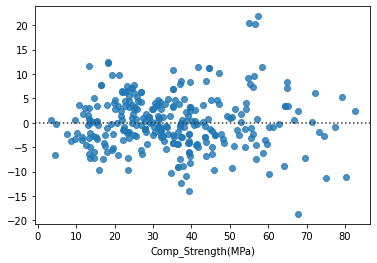

In [50]:
sns.residplot(ytest,ypred)

In [51]:
print(ob1.score(xtest,ytest))
print(ob1.score(xtrain,ytrain))

0.867510814105113
0.9508639200480774


### This calls for Hyper-Parameter Tuning as the model may have been over-fitted

In [52]:
from sklearn.model_selection import GridSearchCV as gscv

In [53]:
ob1=rfc()
params={'n_estimators':[2,3,4,5,6,7],'criterion':['mse','mae']}
grid=gscv(ob1,param_grid=params)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': [2, 3, 4, 5, 6, 7]})

In [54]:
grid.best_params_

{'criterion': 'mse', 'n_estimators': 6}

### Building with these parameters

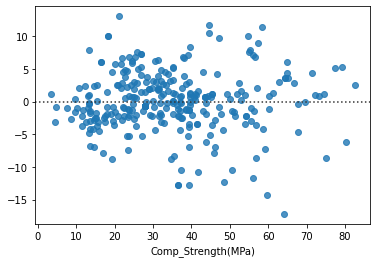

0.9053442120119821
0.9730932820985666


In [55]:
ob11=rfc(n_estimators=7, criterion='mse')
ob11.fit(xtrain,ytrain)
ypred=ob11.predict(xtest)
sns.residplot(ytest,ypred)
plt.show()
print(ob11.score(xtest,ytest))
print(ob11.score(xtrain,ytrain))

### Marginal Improvement over previous model

In [56]:
data={'Random Forest':0.8744411460934487,'K-Fold Random Forest':0}
dataframe=pd.DataFrame(data,index=[0])


In [57]:
dataframe

,Random Forest,K-Fold Random Forest
0,0.874441,0


### Cross-Val-Score

In [58]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestRegressor as rfc
rfc=rfc()
cvs=cvs(rfc,x,y,cv=10)
cvs

array([0.85868376, 0.71129799, 0.81837342, 0.58125611, 0.65900955,
       0.70723913, 0.86900691, 0.79648295, 0.9344105 , 0.9389473 ])

In [59]:
cvs.mean()

0.7874707631687039

## Making a K-Fold cross validation model

In [60]:
from sklearn.model_selection import KFold as kf
kf=kf(n_splits=20)
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestRegressor as rfc
rfc=rfc()
cvs=cvs(rfc,x,y,cv=kf)
cvs


array([0.87779484, 0.84672535, 0.6796513 , 0.96502531, 0.81016386,
       0.8272683 , 0.70305352, 0.63448499, 0.60946842, 0.64095132,
       0.80927555, 0.68395449, 0.89728075, 0.91783211, 0.84044191,
       0.94101097, 0.91970268, 0.94570093, 0.89635265, 0.95162491])

In [61]:
np.mean(cvs)

0.8198882084727351

In [62]:
mean_score=[]
kf=KFold(n_splits=20)  # divides data into 19 parts of training data and 1 part of test data
for train_index,test_index in kf.split(x):
    rfc.fit(x.iloc[train_index],y.iloc[train_index])
    mean_score.append(rfc.score(x.iloc[test_index],y.iloc[test_index]))
    
    #print(test_index.shape)
print('The mean score is:',np.mean(mean_score))

<IPython.core.display.Javascript object>

The mean score is: 0.8228625065273135


In [63]:
dataframe['K-Fold Random Forest']=np.mean(mean_score)

In [64]:
dataframe

,Random Forest,K-Fold Random Forest
0,0.874441,0.822863


### Making a Gradient Boost model to predict the compressive strength

In [65]:
from sklearn.ensemble import GradientBoostingRegressor as gbr
gbr1=gbr()
gbr1.fit(xtrain,ytrain)
ypred=gbr1.predict(xtest)


In [66]:
ypred

array([55.64991967, 14.76355886, 36.12595161, 41.06542295, 34.19229431,
       42.42473802, 27.53104282, 25.88811409, 38.72715583, 48.19392182,
       34.96435358, 34.96435358, 28.0544451 , 34.46178724, 80.50433479,
       38.09357258, 23.72196297, 68.09501747, 60.07091502, 25.93205339,
       32.5834755 , 33.08165024, 42.345233  , 25.19346089, 36.48535981,
       36.50415529, 28.84258495, 21.1262567 , 29.98009111, 28.0544451 ,
       23.37141165, 32.99392133, 39.09349815, 48.22957569, 38.1826187 ,
       39.00789658, 70.606833  , 31.52841928, 24.38823112, 30.26676871,
       32.31163878, 26.04081036, 28.0544451 , 32.19030262, 29.37662146,
       17.71173994, 26.04081036, 33.43457581, 29.09525432, 17.18186795,
       16.03824321, 37.78420861, 39.01496864, 35.14160333, 11.88580982,
       46.41291391, 16.86610353, 44.97730502, 28.0544451 , 14.45495169,
       25.67423974, 36.7720002 , 45.42280558, 69.2701228 , 37.93465024,
       28.02833409, 67.67281822, 31.59298682, 31.181138  , 30.33

In [67]:
gbr1.score(xtest,ytest)

0.9160533703838334

In [68]:
# Updating our daatframe with this accuracy:
dataframe['Grad_Boost']=gbr1.score(xtest,ytest)
dataframe.index=['Accuracy']

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
r2_val= r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

In [70]:
r2_val

0.9160533703838334

In [71]:
mse

20.797891162506286

#### Significantly lower than the one for Random Forest Regression with criterion as entropy

In [72]:
dataframe= dataframe.T

In [73]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053


## Now making K-Fold Cross validation for Grad Boost as well:


In [74]:
from sklearn.model_selection import KFold as kf
kf1=kf(n_splits=20)
from sklearn.model_selection import cross_val_score as cvs
cvs1=cvs(gbr1,x,y,cv=kf1)

In [75]:
cvs1.mean()

0.7998335485479598

In [76]:
dataframe.loc['K-Fold Grad_Boost']=cvs1.mean()

In [77]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834


In [78]:
from sklearn.ensemble import AdaBoostRegressor as ada
ada1=ada()
ada1.fit(xtrain,ytrain)

AdaBoostRegressor()

In [79]:
ypred=ada1.predict(xtest)
ada1.score(xtest,ytest)

0.7928593821418924

In [80]:
dataframe


,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834


In [81]:
dataframe.loc['Ada_Grad']=gbr1.score(xtest,ytest)
#dataframe.index=['Accuracy']

In [82]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053


## Now making K-Fold Cross validation for Grad Boost as well:

In [83]:
from sklearn.model_selection import KFold as kf
kf1=kf(n_splits=20)
from sklearn.model_selection import cross_val_score as cvs
cvs1=cvs(ada1,x,y,cv=kf1)

In [84]:
cvs1.mean()

0.6256053244614702

In [85]:
dataframe.loc['K-Fold Ada_Grad']=np.abs(cvs1).mean()


In [86]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605


## Building a KNN Model:


In [87]:
from sklearn.neighbors import KNeighborsRegressor as knn
from scipy.stats import zscore as zs
xtrain1=xtrain.apply(zs)
xtest1=xtest.apply(zs)

In [88]:
knn1=knn(  n_neighbors=5,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    )

In [89]:
knn1.fit(xtrain1,ytrain)
ypred=knn1.predict(xtest1)
acc_sco=knn1.score(xtest1,ytest)

In [90]:
print(acc_sco)
dataframe.loc['KNN Regressor']=acc_sco
#dataframe.index=['Accuracy']
dataframe

0.8562796985686724


,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605
KNN Regressor,0.856280


## Using Hyper-Parameter tuning to get the best values of n_estimator and distance metric and leaf_size

In [91]:
from sklearn.model_selection import GridSearchCV as gsv
params={'n_neighbors':[3,4,5,6,7,8,9],'p':[2,3,4,5,6],'metric':['minkowski','euclidean','manhattan'],'leaf_size':[10,5,15,23,25,30],'weights':['uniform','distance']}
knn2=knn()
gsv1=gsv(knn2,params)
gsv1.fit(xtrain1, ytrain)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 5, 15, 23, 25, 30],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                         'p': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [92]:
gsv1.best_estimator_

KNeighborsRegressor(leaf_size=5, n_neighbors=6, weights='distance')

In [93]:
gsv1.best_params_

{'leaf_size': 5,
 'metric': 'minkowski',
 'n_neighbors': 6,
 'p': 2,
 'weights': 'distance'}

In [94]:
## So trying eith these values:

knn3=knn(n_neighbors=4,
    weights='distance',
    
    leaf_size=10,
    p=2,
    metric='minkowski',
    )

In [95]:
knn3.fit(xtrain1,ytrain)
knn3.predict(xtest1)
knn3.score(xtest1,ytest)

0.8600285719104954

## A marginal improvement; checking whether it's a case of overfit or underfit:

In [96]:
knn3.score(xtrain1,ytrain)

0.9949800957906262

### Clear case of overfit

In [97]:
#finding out best k value with all others as default parameters:
scores=[]
for i in range(1,51):
    knn4=knn(n_neighbors=i)
    knn4.fit(xtrain1, ytrain)
    scores.append(knn4.score(xtest1,ytest))
    

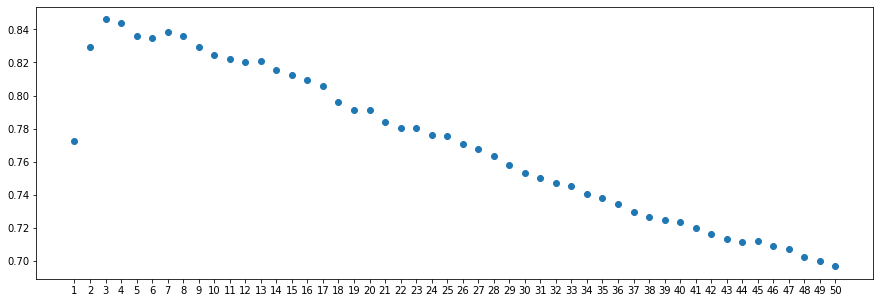

In [98]:
plt.figure(figsize=[15,5])
arr1=np.array(range(1,51))
plt.scatter(arr1,scores)
plt.xticks(range(1,51));

#### k=3 is best default param out of all

#### Plotting mean error:

In [99]:
errors=[]
from sklearn.metrics import mean_squared_error as mse
for i in range(1,51):
    knn4=knn(n_neighbors=i)
    knn4.fit(xtrain1, ytrain)
    ypred=knn4.predict(xtest1)
    errors.append(mse(ytest,ypred))

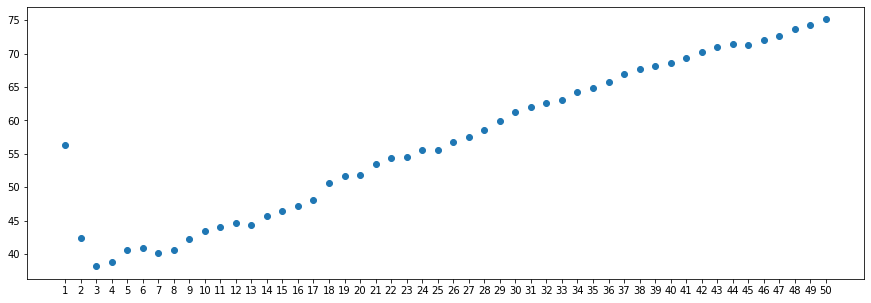

In [100]:
plt.figure(figsize=[15,5])
arr1=np.array(range(1,51))
plt.scatter(arr1,errors)
plt.xticks(range(1,51));


## Again the mse is min for k=3

In [101]:
np.mean(ypred!=ytest)   ## for k=50

0.9158576051779935

In [102]:
(ypred!=ytest).sum()

283

In [103]:
(ypred!=ytest).count()

309

In [104]:
274/309

0.8867313915857605

In [105]:
ypred!=ytest


133    True
771    True
926    True
462    True
857    True
       ... 
596    True
354    True
919    True
479    True
891    True
Name: Comp_Strength(MPa), Length: 309, dtype: bool

### K-Fold Cross Validation for KNN:


In [106]:
cvs2=cvs(knn1,x.apply(zs),y,cv=kf1)  ## Cross Validation Score

In [107]:
val=np.abs(cvs2).mean()

In [108]:
dataframe.loc['K-Fold KNN']=val

In [109]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605
KNN Regressor,0.856280
K-Fold KNN,0.730819


In [110]:
## Getting ourselves a bagging regressor which helps in row-sampling and reducing the variance

In [111]:
from sklearn.ensemble import BaggingRegressor 
bgr1=BaggingRegressor()


In [112]:
bgr1.fit(xtrain1, ytrain)
bgr1.score(xtest1,ytest)

0.8708192569361577

In [113]:
dataframe.loc['Bagging_Regressor']=bgr1.score(xtest1,ytest)

In [114]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605
KNN Regressor,0.856280
K-Fold KNN,0.730819
Bagging_Regressor,0.870819


In [115]:
bgr2=BaggingRegressor()
bgr2.fit(xtrain, ytrain)
print(bgr2.score(xtrain, ytrain))
print(bgr2.score(xtest, ytest))

0.9750709629647957
0.8838044651077264


In [116]:
bgr2.fit(xtrain1, ytrain)

BaggingRegressor()

In [117]:
print(bgr2.score(xtrain1, ytrain))
print(bgr2.score(xtest1, ytest))

0.9751174412584087
0.8829507342784582


### Case of overfit

In [118]:
from sklearn.metrics import mean_squared_error as mse, r2_score
mse(ytest, bgr2.predict(xtest1))

28.999114083063645

In [119]:
# Higher MSE

In [120]:
 r2_score(ytest, bgr2.predict(xtest1))

0.8829507342784582

In [121]:
# Reasonable R squared value

## Making K-Fold Cross Validation wherein we will split the dataset in desired ratio of train and test dataset and try to fit the model

In [122]:
from sklearn.model_selection import KFold as kf, cross_val_score as cvs
kf1=kf(n_splits=20)
cvs2=cvs(bgr1, x.apply(zs),y, cv=kf1)

In [123]:
cvs2.mean()
print(cvs2.max())

0.9625000783769082


In [124]:
dataframe.loc['Bagging_Regressor K-Fold']=cvs2.mean()

In [125]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605
KNN Regressor,0.856280
K-Fold KNN,0.730819
Bagging_Regressor,0.870819
Bagging_Regressor K-Fold,0.800327


### Making a Decision tree using Gini Index and Entropy to fit the points


In [126]:
from sklearn.tree import DecisionTreeRegressor
dtr1=DecisionTreeRegressor(criterion='mae')
dtr1.fit(xtrain1,ytrain)

DecisionTreeRegressor()

In [130]:
ypred=dtr1.predict(xtest1)

In [131]:
dtr1.score(xtrain1,ytrain)

0.9949800957906262

In [133]:
dtr1.score(xtest1,ytest)

0.7857977281382562

In [136]:
mse=np.mean((ypred-ytest)**2)

In [137]:
mse

53.068902912621354

In [139]:
(ypred!=ytest).mean()

0.8478964401294499

In [143]:
dtr2=DecisionTreeRegressor(criterion='mae')
dtr2.fit(xtrain1,ytrain)
dtr2.score(xtest1,ytest)

0.7486771654987927

In [144]:
## model gives poor accuracy for error criteria set as mae

In [187]:
## Coding R Squared Value
r2_val=1-(np.sum((ytest-ypred)**2))/np.sum((ytest-np.mean(ytest))**2)

In [188]:
r2_val

0.7857977281382562

In [190]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7857977281382562

In [193]:
dataframe.loc['Decision Trees']=dtr1.score(xtest1,ytest)

In [194]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605
KNN Regressor,0.856280
K-Fold KNN,0.730819
Bagging_Regressor,0.870819
Bagging_Regressor K-Fold,0.800327


In [198]:
pd.DataFrame(dtr1.feature_importances_, index=[xtrain1.columns], columns=['Feature Importance'])

,Feature Importance
Cement(kg/m^3),0.379266
BFSlag(kg/m^3),0.109943
Fly_Ash(kg/m^3),0.016189
Water(kg/m^3),0.074603
Superplasticizer(kg/m^3),0.081219
CoarseAgg(kg/m^3),0.024399
FineAgg(kg/m^3),0.019762
Age,0.294618


## Now we are going to perform feature sampling and building our model based on that

In [228]:
xtrain2=xtrain1.copy()

xtest2=xtest1.copy()

In [229]:
xtrain2.head()

,Cement(kg/m^3),BFSlag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),CoarseAgg(kg/m^3),FineAgg(kg/m^3),Age
172,1.449849,0.455216,-0.896821,-0.201748,0.938363,-0.079769,0.762456,2.261154
631,0.626184,-0.834288,-0.896821,0.418202,-1.043535,0.626994,0.329593,-0.908638
724,0.502634,-0.834288,-0.896821,0.580812,-1.043535,0.456084,0.525026,2.223418
152,0.935882,1.458433,-0.896821,0.029971,0.349800,0.230550,0.216491,0.940407
363,-0.253490,-0.171946,1.091497,-0.459892,0.385834,0.669554,0.369927,2.600774


In [230]:
xtrain2.drop(['Fly_Ash(kg/m^3)','CoarseAgg(kg/m^3)','FineAgg(kg/m^3)'], axis=1, inplace=True)

In [231]:
xtest2.drop(['Fly_Ash(kg/m^3)','CoarseAgg(kg/m^3)','FineAgg(kg/m^3)'], axis=1, inplace=True)
xtest2

,Cement(kg/m^3),BFSlag(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),Age
133,0.272196,1.452295,-0.513886,0.403288,-0.179239
771,0.642427,-0.825895,0.520717,-1.024975,-1.110387
926,-0.757327,1.600848,0.739449,0.250260,-0.179239
462,-0.671188,-0.671672,-0.249220,-0.502129,2.502470
857,-1.005804,1.521469,0.236365,-0.387358,-0.179239
...,...,...,...,...,...
596,-0.688582,0.937463,0.382916,-1.024975,-0.961404
354,0.196825,0.283149,-0.163915,0.403288,-1.110387
919,0.493341,-0.825895,0.214492,-0.004787,-0.179239
479,1.594922,-0.553737,-0.135479,0.454297,-0.961404


In [212]:
## Now fitting our model on these datasets 

In [232]:
dtr1.fit(xtrain2,ytrain)
y_pred=dtr1.predict(xtest2)

In [233]:
dtr1.score(xtest2,ytest)

0.7564160025644899

In [234]:
## Score got improved only by a little; so now doing both row sampling and feature sampling

In [262]:
from sklearn.model_selection import KFold as kf
kf1=kf(n_splits=40)
from sklearn.model_selection import cross_val_score as cvs
xtrain2=x.copy()
xtrain2.drop(['Fly_Ash(kg/m^3)','CoarseAgg(kg/m^3)','FineAgg(kg/m^3)'], axis=1, inplace=True)
xtrain2=xtrain2.apply(zs)
scor1=cvs(dtr1,xtrain2,y, cv=kf1)

In [263]:
np.mean(np.abs(scor1))

0.7857421733241151

In [250]:
xtrain2.apply(zs)

,Cement(kg/m^3),BFSlag(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),Age
0,2.389670,-0.831040,-0.059217,-0.731830,-0.135215
1,2.389670,-0.831040,-0.059217,-0.731830,-0.135215
2,-1.833906,-0.498582,-2.837595,2.382226,-0.135215
3,-1.833906,-0.498582,-2.837595,2.382226,-0.135215
4,-1.833906,-0.498582,-2.837595,2.382226,-0.135215
...,...,...,...,...,...
1025,0.215188,0.546284,0.305704,0.049737,-0.135215
1026,0.593000,-0.831040,0.645744,0.232917,-0.135215
1027,-0.839881,0.824123,0.577322,-0.292198,-0.135215
1028,-0.752440,1.385739,0.222767,0.342825,-0.135215


In [264]:
dataframe.loc['Decision Trees with Feature and Row Sampling']=np.mean(np.abs(scor1))

In [265]:
dataframe

,Accuracy
Random Forest,0.874441
K-Fold Random Forest,0.822863
Grad_Boost,0.916053
K-Fold Grad_Boost,0.799834
Ada_Grad,0.916053
K-Fold Ada_Grad,0.625605
KNN Regressor,0.856280
K-Fold KNN,0.730819
Bagging_Regressor,0.870819
Bagging_Regressor K-Fold,0.800327
